In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [9]:
#mydata1=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Ml_Data\Data-BA\car details v4.csv")
mydata2=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Ml_Data\Data-BA\car data.csv")

In [10]:
#mydata1.head()

In [8]:
mydata2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
#Targert is Selling_Price

In [12]:
mydata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
mydata2.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2308\2244318845.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mydata2.corr()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


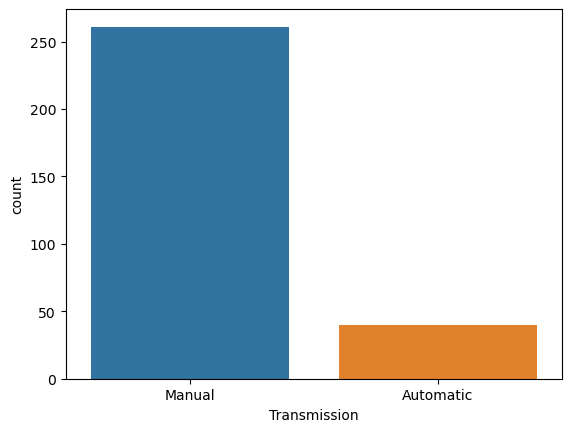

In [16]:
sb.countplot(x="Transmission",data=mydata2)
plt.show()

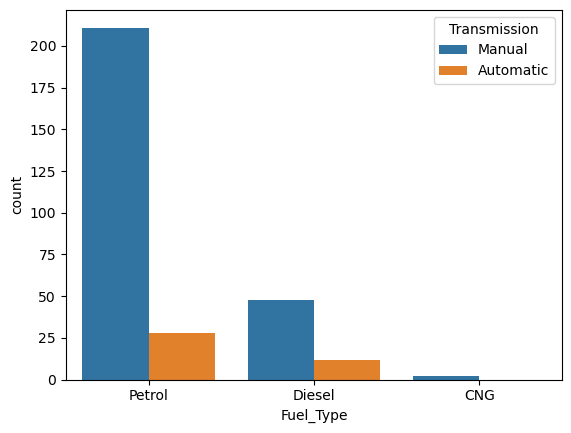

In [19]:
sb.countplot(x="Fuel_Type",data=mydata2,hue="Transmission")
plt.show()

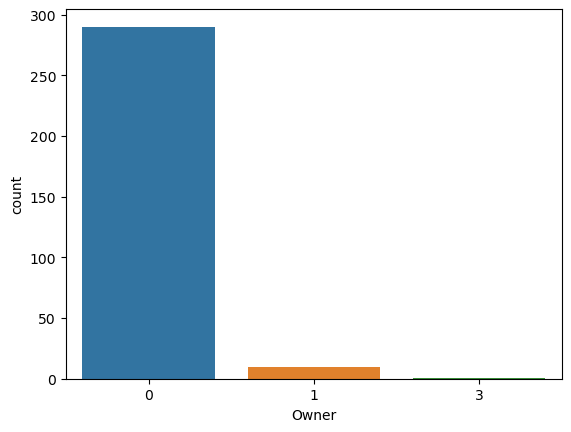

In [18]:
sb.countplot(x="Owner",data=mydata2)
plt.show()

In [24]:
#sb.distplot(mydata2,x='Kms_Driven')
#plt.show()

In [25]:
mydata2.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

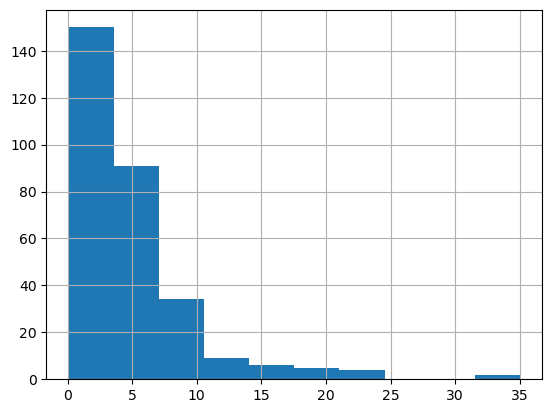

In [29]:
mydata2["Selling_Price"].hist()
plt.show()

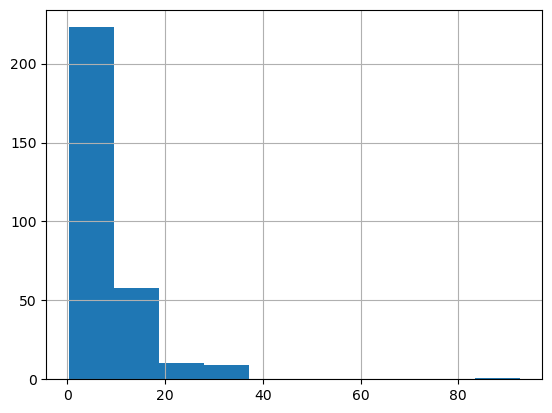

In [30]:
mydata2["Present_Price"].hist()
plt.show()

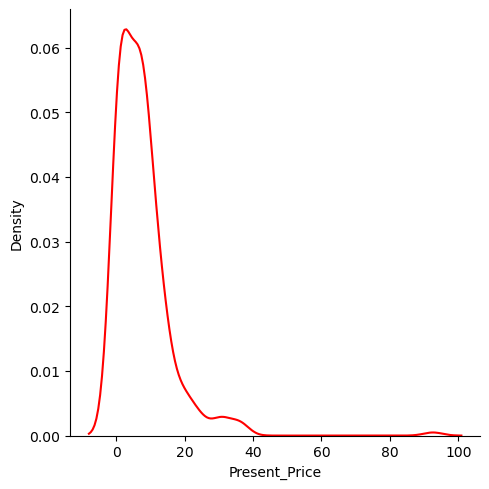

In [31]:
sb.displot(data=mydata2,x="Present_Price",kind='kde',color='red')
plt.show()

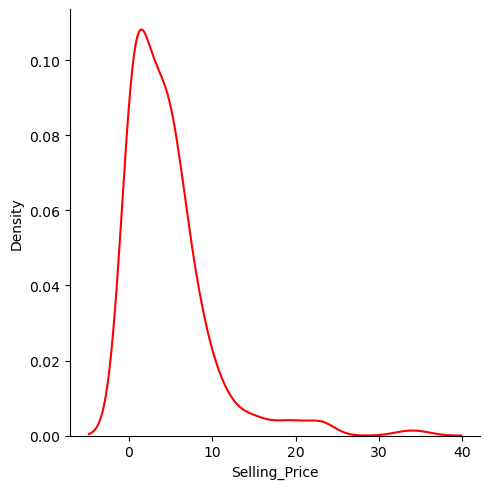

In [32]:
sb.displot(data=mydata2,x="Selling_Price",kind='kde',color='red')
plt.show()

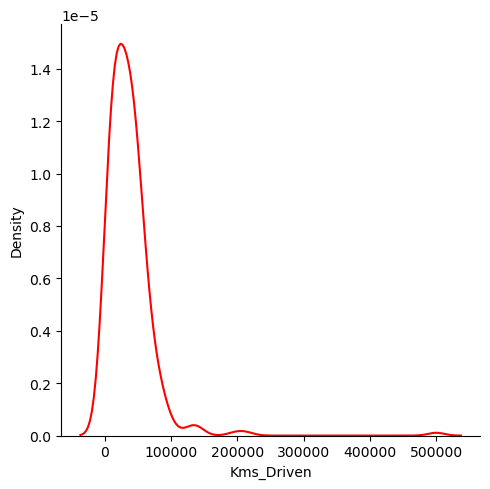

In [40]:
sb.displot(data=mydata2,x="Kms_Driven",kind='kde',color='red')
plt.show()

In [33]:
mydata2.skew()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2308\1853810463.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mydata2.skew()


Year            -1.246189
Selling_Price    2.493422
Present_Price    4.083150
Kms_Driven       6.436013
Owner            7.616850
dtype: float64

In [34]:
#Target 
Y_target=mydata2["Selling_Price"]
X_feature=mydata2[["Present_Price","Kms_Driven","Fuel_Type"]]

In [36]:
#X_feature

In [37]:
Y_target

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [39]:
X_feature.describe()

,Present_Price,Kms_Driven
count,301.000000,301.000000
mean,7.628472,36947.205980
std,8.644115,38886.883882
min,0.320000,500.000000
25%,1.200000,15000.000000
50%,6.400000,32000.000000
75%,9.900000,48767.000000
max,92.600000,500000.000000


In [41]:
Y_target.describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

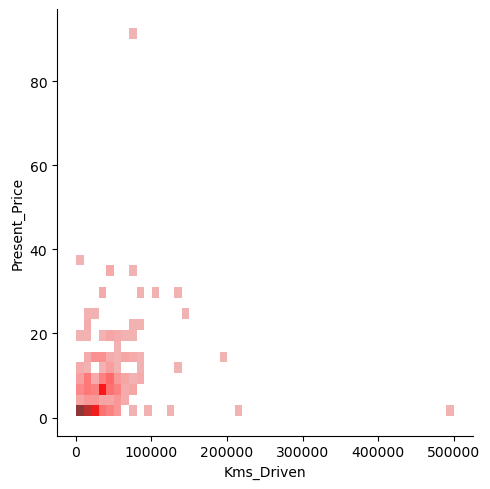

In [43]:
sb.displot(data=mydata2,x="Kms_Driven",y="Present_Price",kind='hist',color='red')
plt.show()

## Box Plot 

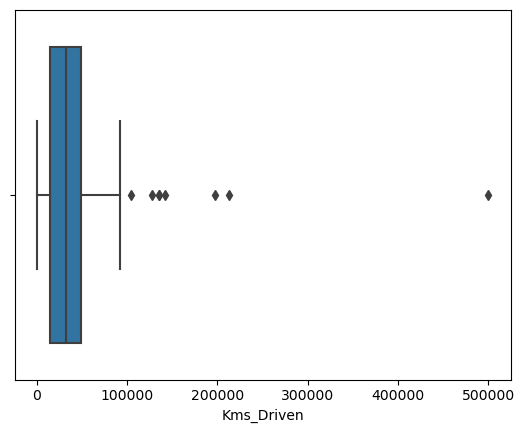

In [44]:
sb.boxplot(data=X_feature,x="Kms_Driven")
plt.show()

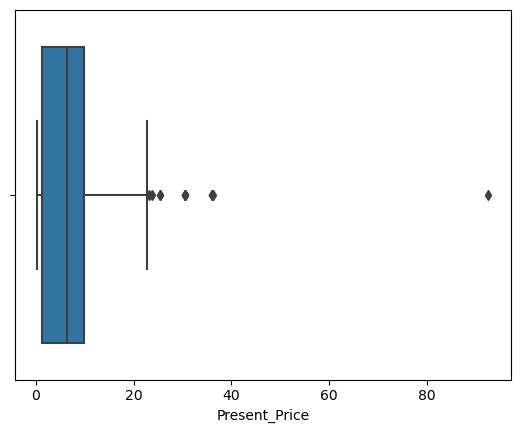

In [45]:
sb.boxplot(data=X_feature,x="Present_Price")
plt.show()